In [1]:
#Importing dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
#reading file into a dataframe
file = "clean_data.csv"
df = pd.read_csv(file)
df.columns

Index(['API', 'Longitude', 'Latitude', 'Well Type', 'Operator',
       'Operator (Original)', 'Sub-play', 'County', 'First Production Date',
       'Vertical Depth (m)', 'Measured Depth (m)', 'Lateral Length (m)',
       'Drilling Days (days)', 'Drilling Speed (m/day)', 'Proppant (kg)',
       'API Gravity (degree)', 'Well Cost Total (US$)', 'Rig Cost (US$)',
       'Casing Cost (US$)', 'Water Cost (US$)', 'Proppant Cost (US$)',
       'Pumping Cost (US$)', 'Other Cost (US$)', 'Cum180 Oil (bbl)',
       'Cum365 Oil (bbl)', 'Cum180 Gas (mcf)', 'Cum365 Gas (mcf)',
       'Cum365 Total (boe)', 'IP Oil (b/d)', 'IP Gas (mmcfd)',
       'IP Total (boe/d)', 'EUR Oil (mmbbl)', 'EUR Gas (bcf)',
       'EUR Total (mmboe)'],
      dtype='object')

In [36]:
#Overview of Eagle Ford Play
summary = df.groupby(['Sub-play'])['Operator', "API"].nunique()
summary = summary.rename(columns = {"API": "Well count", "Operator": "Operator Count"})
print(df['Well Type'].unique())
summary

['Oil' 'Gas' 'Oil & Gas' 'Undetermined']


,Operator Count,Well count
Sub-play,,
Black Oil,76,4167
Edwards Condensate,24,2939
Hawkville Condensate,29,2690
Karnes Trough,30,3644
Maverick Condensate,21,3115
Maverick Oil,17,146
Northeast Oil,21,404
Other Eagle Ford,11,33
Southeast Gas,5,45


In [4]:
#Overview of Eagle Ford Play

#Calculating summary statistics for each sub-play

agg = {
    'Well Cost Total (US$)': {'Avg Well cost': 'mean'}, 
    'Rig Cost (US$)': {'Avg Rig Cost (US$)':'mean'}, 
    'EUR Total (mmboe)':{'Avg EUR (mmboe)': 'mean'},
    'Cum365 Gas (mcf)': {'Avg Cum365 Gas (mcf)': 'mean', 'Max Cum365 Gas (mcf)': max},
    'Cum365 Oil (bbl)': {'Avg Cum365 Oil (bbl)': 'mean', 'Max Cum365 Oil (bbl)': max}

}


summary_1 = df.groupby(['Sub-play']).agg(agg)
summary_1.columns = summary_1.columns.droplevel()
summary_1

C:\Users\colem\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,Avg Well cost,Avg Rig Cost (US$),Avg EUR (mmboe),Avg Cum365 Gas (mcf),Max Cum365 Gas (mcf),Avg Cum365 Oil (bbl),Max Cum365 Oil (bbl)
Sub-play,,,,,,,
Black Oil,6.616557e+06,571394.653952,0.303541,71959.004440,631180.0,71987.674589,457540.0
Edwards Condensate,7.352757e+06,787762.745528,0.528737,491961.127064,5670010.0,102136.813352,954071.0
Hawkville Condensate,7.286108e+06,684179.590484,0.378131,234708.285273,3355674.0,62014.647468,481699.0
Karnes Trough,7.205512e+06,649498.131925,0.437968,164809.770368,2157301.0,113501.175123,915021.0
Maverick Condensate,6.653161e+06,679298.460690,0.616124,538671.729564,3743322.0,47548.895095,522446.0
Maverick Oil,6.445103e+06,517461.491525,0.182250,45906.956835,313667.0,30959.719424,147557.0
Northeast Oil,7.574177e+06,734220.834437,0.220791,61836.686649,924010.0,44678.446866,181615.0
Other Eagle Ford,7.049492e+06,669419.900026,0.160435,28213.848485,193871.0,39411.545455,94201.0
Southeast Gas,7.884221e+06,972062.909091,0.623721,985148.333333,2457807.0,5387.577778,26339.0


In [5]:
#Merging two dataframs into one to get an overview of Eagle Ford Play by Sub-play:
summary_final  = pd.merge(summary, summary_1, left_index=True, right_index=True)
summary_final

,Operator Count,Well count,Avg Well cost,Avg Rig Cost (US$),Avg EUR (mmboe),Avg Cum365 Gas (mcf),Max Cum365 Gas (mcf),Avg Cum365 Oil (bbl),Max Cum365 Oil (bbl)
Sub-play,,,,,,,,,
Black Oil,76,4167,6.616557e+06,571394.653952,0.303541,71959.004440,631180.0,71987.674589,457540.0
Edwards Condensate,24,2939,7.352757e+06,787762.745528,0.528737,491961.127064,5670010.0,102136.813352,954071.0
Hawkville Condensate,29,2690,7.286108e+06,684179.590484,0.378131,234708.285273,3355674.0,62014.647468,481699.0
Karnes Trough,30,3644,7.205512e+06,649498.131925,0.437968,164809.770368,2157301.0,113501.175123,915021.0
Maverick Condensate,21,3115,6.653161e+06,679298.460690,0.616124,538671.729564,3743322.0,47548.895095,522446.0
Maverick Oil,17,146,6.445103e+06,517461.491525,0.182250,45906.956835,313667.0,30959.719424,147557.0
Northeast Oil,21,404,7.574177e+06,734220.834437,0.220791,61836.686649,924010.0,44678.446866,181615.0
Other Eagle Ford,11,33,7.049492e+06,669419.900026,0.160435,28213.848485,193871.0,39411.545455,94201.0
Southeast Gas,5,45,7.884221e+06,972062.909091,0.623721,985148.333333,2457807.0,5387.577778,26339.0


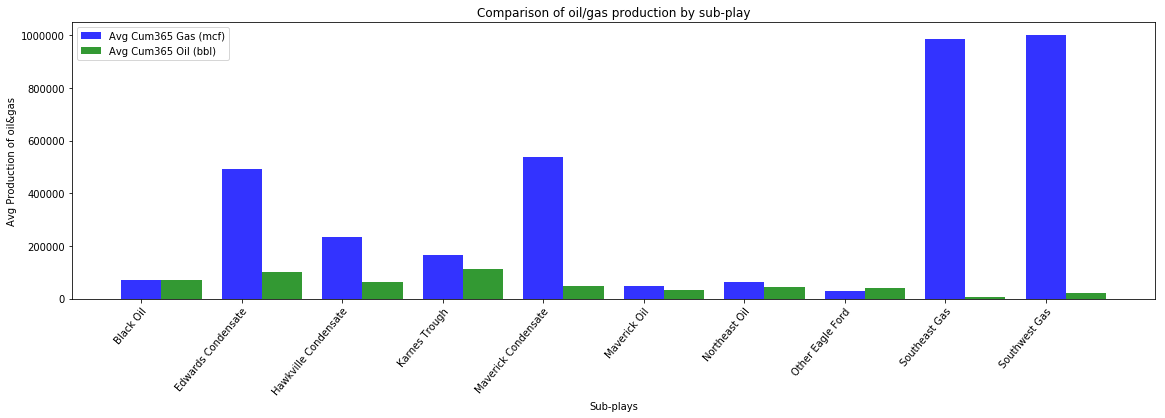

In [6]:
# data to plot
n_groups = 10
sub_plays = summary_final.index[0:10]


# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.4
opacity = 0.8
 
rects1 = plt.bar(index, summary_final['Avg Cum365 Gas (mcf)'], bar_width, alpha=opacity,
                 color='b', align='center',
                 label='Avg Cum365 Gas (mcf)')
 
rects2 = plt.bar(index + bar_width, summary_final['Avg Cum365 Oil (bbl)'] , bar_width,
                 alpha=opacity,
                 color='g',
                 label='Avg Cum365 Oil (bbl)', 
                 align='center')
 
plt.xlabel('Sub-plays')
plt.ylabel('Avg Production of oil&gas')
plt.title('Comparison of oil/gas production by sub-play')
plt.xticks(index, sub_plays, rotation=50, rotation_mode="anchor", horizontalalignment="right")

plt.legend(loc=2)
 
plt.tight_layout()
fig.set_size_inches(19,8)
plt.show()

In [7]:
#Summary for top 5 operators

operator_summary = df.groupby(['Operator']).mean()
operator_summary = operator_summary.sort_values(ascending=False, by = 'EUR Total (mmboe)')[:5]
operator_summary.columns

operator_summary = operator_summary.drop(columns = ['API', 'Longitude', 'Latitude','Drilling Days (days)', 'Drilling Speed (m/day)', 
                                                    'Cum365 Oil (bbl)', 'Cum365 Gas (mcf)',
                                                    'Cum365 Total (boe)', 'IP Oil (b/d)', 'IP Gas (mmcfd)',
                                                    'IP Total (boe/d)', 'EUR Oil (mmbbl)', 'EUR Gas (bcf)'])

operator_summary


,Vertical Depth (m),Measured Depth (m),Lateral Length (m),Proppant (kg),API Gravity (degree),Well Cost Total (US$),Rig Cost (US$),Casing Cost (US$),Water Cost (US$),Proppant Cost (US$),Pumping Cost (US$),Other Cost (US$),Cum180 Oil (bbl),Cum180 Gas (mcf),EUR Total (mmboe)
Operator,,,,,,,,,,,,,,,
Fasken Oil & Ranch,2609.214286,4781.000000,2021.428571,2.911007e+06,61.338804,7.280984e+06,6.761295e+05,238248.642857,730473.071429,2.864281e+05,1.239452e+06,4.110253e+06,40430.071429,479463.857143,2.488815
Escondido Resources,3171.536523,5631.252320,2341.677125,3.813755e+06,56.026815,8.789593e+06,6.940579e+05,277944.123188,833444.083287,6.227185e+05,2.415794e+06,3.945634e+06,2199.921876,952098.329384,0.867171
SM Energy,2509.643160,4460.552384,1853.049968,4.329512e+06,57.477582,6.795592e+06,5.990429e+05,250747.022937,763129.477309,1.049112e+06,1.387750e+06,2.745811e+06,16004.157441,587998.964059,0.770743
Noble Energy,2549.305695,4384.611115,1749.101562,3.174483e+06,58.316427,6.152214e+06,5.689929e+05,248684.730122,632499.915684,7.893246e+05,8.368382e+05,3.075873e+06,37270.693037,649983.347962,0.729761
Repsol,3435.816109,5164.821918,1690.990868,2.644288e+06,56.434375,9.237435e+06,1.230930e+06,417570.000000,425135.000000,4.033840e+05,1.451181e+06,5.309236e+06,30173.657817,338184.421091,0.724411


In [55]:
oil = df[(df['Well Type'] != 'Gas')]
gas = df[(df['Well Type'] == 'Gas')]
print(gas.head(1))
oil.head(5)

                API  Longitude   Latitude Well Type Operator  \
534  42025336250000 -97.945528  28.685418       Gas  Statoil   

    Operator (Original)            Sub-play County First Production Date  \
534  Enduring Resources  Edwards Condensate    Bee            2011-01-05   

     Vertical Depth (m)        ...          Cum365 Oil (bbl)  \
534              4014.0        ...                     308.0   

     Cum180 Gas (mcf)  Cum365 Gas (mcf)  Cum365 Total (boe)  IP Oil (b/d)  \
534           18398.0           32125.0              5962.0          6.52   

     IP Gas (mmcfd)  IP Total (boe/d)  EUR Oil (mmbbl)  EUR Gas (bcf)  \
534            0.44             83.37              0.0          0.109   

     EUR Total (mmboe)  
534               0.02  

[1 rows x 34 columns]


,API,Longitude,Latitude,Well Type,Operator,Operator (Original),Sub-play,County,First Production Date,Vertical Depth (m),...,Cum365 Oil (bbl),Cum180 Gas (mcf),Cum365 Gas (mcf),Cum365 Total (boe),IP Oil (b/d),IP Gas (mmcfd),IP Total (boe/d),EUR Oil (mmbbl),EUR Gas (bcf),EUR Total (mmboe)
0,42013342710000,-98.332847,28.954002,Oil,EOG Resources,Chaparral Natural Resources,Black Oil,Atascosa,2010-01-12,2579.597534,...,17850.000000,6103.000000,10510.000000,19700.000000,83.500000,0.04,89.77,0.082000,0.043000,0.090000
1,42013342730000,-98.455662,28.728584,Oil,EOG Resources,EOG Resources,Black Oil,Atascosa,2010-01-12,2579.597534,...,10853.000000,9439.000000,16553.000000,13766.000000,42.340000,0.13,64.09,0.053000,0.156000,0.081000
2,42013342780000,-98.470619,28.698830,Oil,Dewbre Petroleum Corporation,Dewbre Petroleum Corporation,Black Oil,Atascosa,2011-01-03,2975.000000,...,42766.000000,17618.000000,19941.000000,46276.000000,276.450000,0.16,287.40,0.172000,0.120000,0.193000
3,42013342790000,-98.450319,28.726421,Oil,EOG Resources,EOG Resources,Black Oil,Atascosa,2010-01-12,2944.000000,...,10853.000000,9439.000000,16553.000000,13766.000000,42.340000,0.13,64.09,0.053000,0.156000,0.081000
4,42013342850000,-98.439686,28.734653,Oil,EOG Resources,EOG Resources,Black Oil,Atascosa,2010-01-12,2579.597534,...,25943.000000,17487.000000,25416.000000,30416.000000,127.350000,0.17,139.48,0.105000,0.119000,0.125000
5,42013342890000,-98.503519,28.712835,Oil,EOG Resources,EOG Resources,Black Oil,Atascosa,2010-01-12,2882.000000,...,22870.000000,12093.000000,19686.000000,26335.000000,128.460000,0.14,145.84,0.092000,0.118000,0.113000
6,42013342900000,-98.443229,28.730629,Oil,EOG Resources,EOG Resources,Black Oil,Atascosa,2010-01-12,2579.597534,...,25943.000000,17487.000000,25416.000000,30416.000000,127.350000,0.17,139.48,0.105000,0.119000,0.125000
7,42013342910000,-98.167133,28.789627,Oil,ExxonMobil,XTO Energy,Karnes Trough,Atascosa,2010-01-10,3338.000000,...,4834.000000,2107.000000,2107.000000,5205.000000,793.730000,0.36,843.11,0.482000,0.523000,0.571000
8,42013343040000,-98.342421,28.952621,Oil,EOG Resources,EOG Resources,Black Oil,Atascosa,2010-01-12,2579.597534,...,17850.000000,6103.000000,10510.000000,19700.000000,83.500000,0.04,89.77,0.082000,0.043000,0.090000
9,42013343060000,-98.154156,28.776823,Oil,Marathon Oil,Hilcorp Energy,Karnes Trough,Atascosa,2010-01-12,3234.000000,...,38713.000000,16303.000000,20219.000000,42272.000000,196.740000,0.16,225.67,0.173000,0.178000,0.205000


In [56]:
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import numpy as np
import numpy as np
import matplotlib

olats = list(oil['Latitude'])
olons = list(oil['Longitude'])
glats = list(gas['Latitude'])
glons = list(gas['Longitude'])




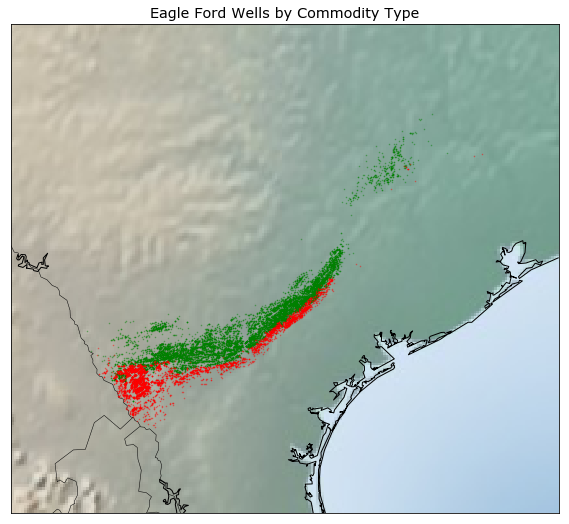

In [63]:
# setting parameters for title and axes
font = {'family' : 'verdana',
        'size'   : 12}
matplotlib.rc('font', **font)
   
# How much to zoom from coordinates (in degrees)
zoom_scale = 1

# Setup the bounding box for the zoom and bounds of the map
bbox = [np.min(lats)-zoom_scale,np.max(lats)+zoom_scale,\
        np.min(lons)-zoom_scale,np.max(lons)+zoom_scale]

fig, ax = plt.subplots(figsize=(15,9))
plt.title("Eagle Ford Wells by Commodity Type")
# Define the projection, scale, the corners of the map, and the resolution.
m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
            llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

# Draw coastlines and fill continents and water with color
m.drawcoastlines()
m.drawstates()
m.drawcountries()
#m.etopo()
m.shadedrelief()

for i in range(len(olons)):
    x,y = m(float(olons[i]), float(olats[i]))
    m.plot(x, y, marker = 'o', c='green', markersize=0.5, alpha=0.5, latlon=False)

for i in range(len(glons)):
    x,y = m(float(glons[i]), float(glats[i]))
    m.plot(x, y, marker = 'o', c='red', markersize=0.5, alpha=0.5, latlon=False)    

# save the figure and show it
plt.savefig('EagleFordWells.png', format='png', dpi=96, transparent=True)
plt.show()

<class 'zip'>


In [ ]:
sPlay = list(df['Sub-play'])
spUnique = df['Sub-Play'].unique()
print(spUnique)

try:
    for i in range(len(spUnique)):
        play = spUnique[i]
        lats = play + "Lats"
        lons = play + "Lons"
        lats = []
        for p in range(len(lats)):
            if df.Sub-Play == play:
            name.append